In [1]:
import os
import numpy as np
import cv2
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import load_model
import cv2

from tensorflow import keras
from keras.layers import Input
from keras.models import Model
from keras.callbacks import Callback
import matplotlib.pyplot as plt

#from tensorflow.keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from skimage.segmentation import mark_boundaries
import keras.utils as image
from keras.utils import load_img,img_to_array,array_to_img
from matplotlib import cm
from keras.layers import Dense, GlobalAveragePooling2D
from collections import Counter
from google.colab import drive


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

# Load the pre-trained ResNet50V2 model without the top layer
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer for classification
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the training and validation data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset6/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset6/chest_xray/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)




Found 5106 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


Epoch 1/25
160/160 [==============================] - 1376s 8s/step - loss: 0.1505 - accuracy: 0.9442 - val_loss: 0.4641 - val_accuracy: 0.8542
Epoch 2/25
160/160 [==============================] - 82s 509ms/step - loss: 0.0790 - accuracy: 0.9706 - val_loss: 0.6807 - val_accuracy: 0.8013
Epoch 3/25
160/160 [==============================] - 80s 502ms/step - loss: 0.0603 - accuracy: 0.9759 - val_loss: 0.8655 - val_accuracy: 0.7756
Epoch 4/25
160/160 [==============================] - 81s 504ms/step - loss: 0.0455 - accuracy: 0.9822 - val_loss: 1.3982 - val_accuracy: 0.7067
Epoch 5/25
160/160 [==============================] - 85s 532ms/step - loss: 0.0345 - accuracy: 0.9882 - val_loss: 0.8106 - val_accuracy: 0.7997
Epoch 6/25
160/160 [==============================] - 89s 556ms/step - loss: 0.0284 - accuracy: 0.9890 - val_loss: 0.5644 - val_accuracy: 0.8429
Epoch 7/25
160/160 [==============================] - 84s 525ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.5322 - val_acc

In [ ]:
model.save('/content/drive/MyDrive/IPD/gradcam.h5')

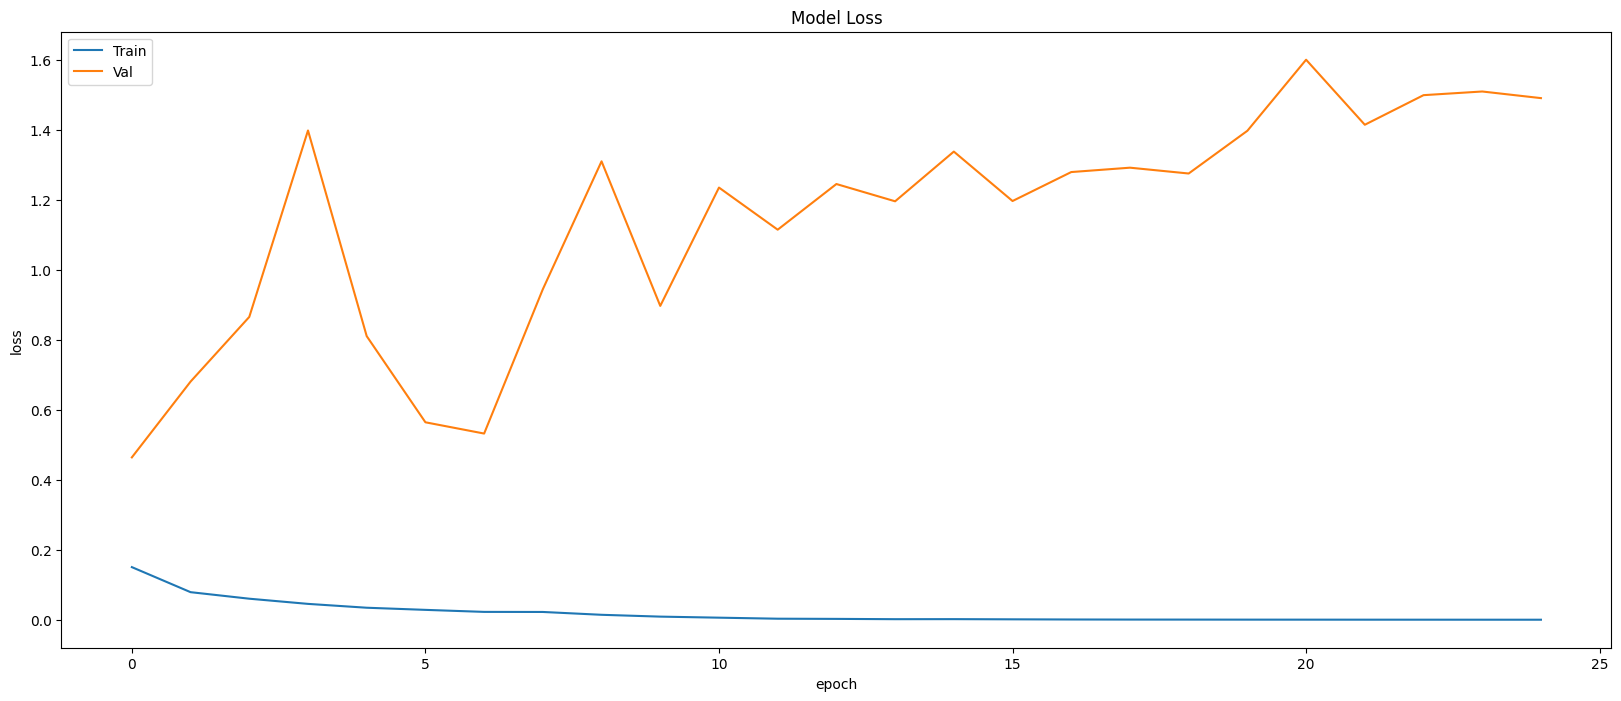

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.savefig("model_loss.png")

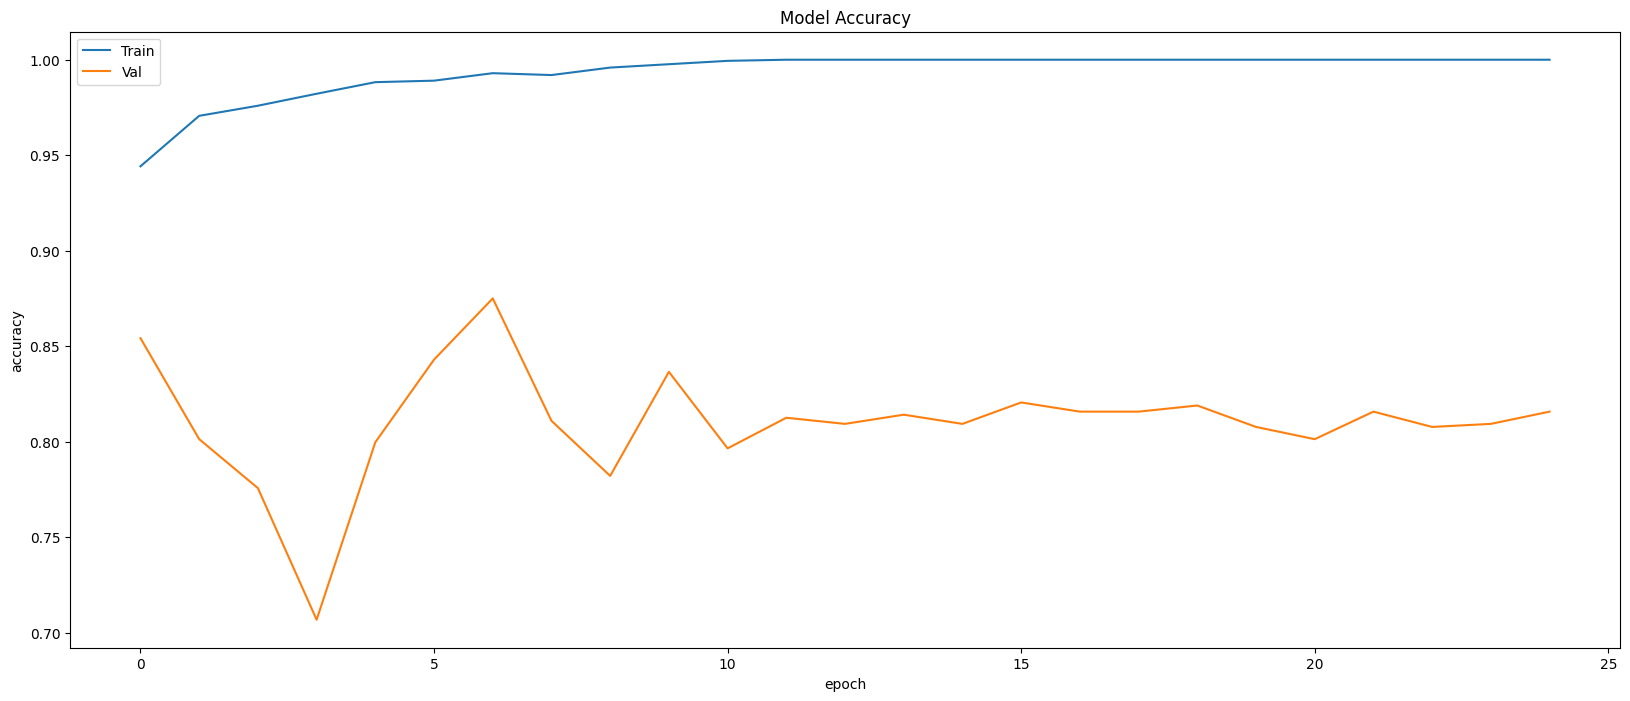

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.savefig("model_accuracy.png")

In [8]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/IPD/final_gradcam.h5")

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
test2_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset6/chest_xray/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [ ]:
test2_generator = test2_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [ ]:
y_test = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_probs = y_pred.copy()
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

1/1 [==============================] - 9s 9s/step


In [ ]:
y_test = test2_generator.classes
y_pred = model.predict(test2_generator)
y_pred_probs = y_pred.copy()
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

20/20 [==============================] - 67s 3s/step


In [ ]:
y_test = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_probs = y_pred.copy()
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

20/20 [==============================] - 9s 452ms/step


Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       0.46      0.25      0.32       234
   Pnuemonia       0.65      0.82      0.72       390

    accuracy                           0.61       624
   macro avg       0.55      0.54      0.52       624
weighted avg       0.57      0.61      0.57       624



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       0.39      0.24      0.30       234
   Pnuemonia       0.63      0.77      0.69       390

    accuracy                           0.57       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.54      0.57      0.55       624



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       0.62      0.62      0.62         8
   Pnuemonia       0.62      0.62      0.62         8

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16



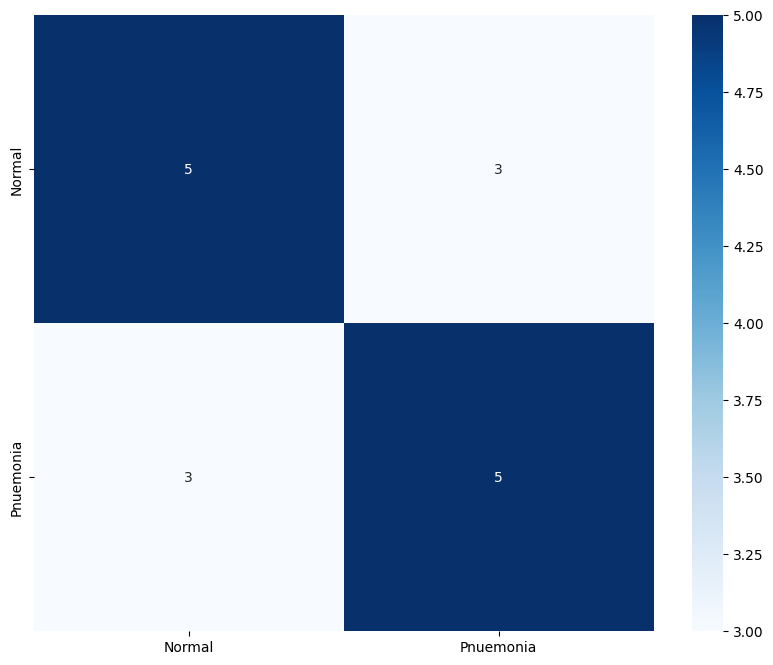

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()

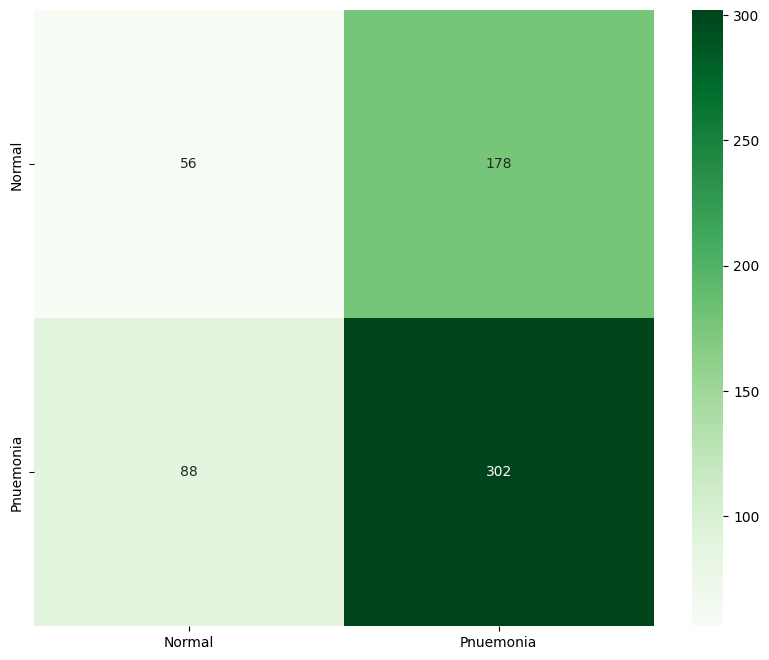

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Greens')
plt.show()

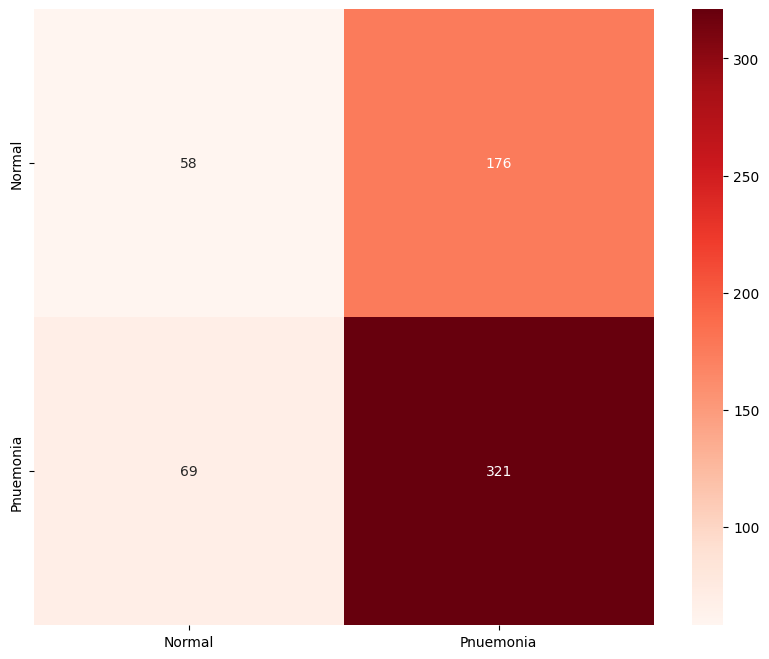

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Reds')
plt.show()

In [10]:
#conv5_block3_out
# Get the trained convolutional layer
trained_conv_layer = model.get_layer('conv5_block3_2_conv')
last_conv_layer_name='conv5_block3_2_conv'
classifier_layer_names = [
    "bn",
    "relu",
    "averagepooling2d_head",
    "flatten_head",
    "dense_head",
    "dropout_head",
    "predictions_head"
]
# Load and preprocess an image for GradCAM
#img_path ="/content/drive/MyDrive/New Dataset/val/NORMAL/NORMAL2-IM-1437-0001.jpeg"
img_path ='/content/image.jpeg'
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
img_size = (224, 224)

1/1 [==============================] - 0s 34ms/step


<ipython-input-11-e4dc97219d4b>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


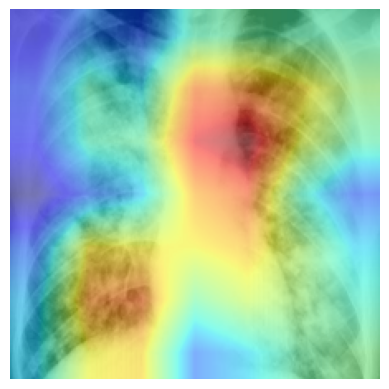

In [11]:
# Convert the input image to a NumPy array
img_array = np.array(img)

# Convert the input image to RGB format
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

# Predict the class probabilities
preds = model.predict(x)
class_index = np.argmax(preds[0])

# Obtain the last convolutional layer
last_conv_layer = model.get_layer('conv5_block3_2_conv')

# Compute the gradient of the class output value with respect to the feature map of the last convolutional layer
grad_model = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
with tf.GradientTape() as tape:
    preds, conv_outputs = grad_model(x)
    class_idx = tf.argmax(preds[0])
    loss = preds[:, class_idx]
grads = tape.gradient(loss, conv_outputs)[0]

# Compute the channel-wise mean of the gradients
weights = tf.reduce_mean(grads, axis=(0, 1))

# Multiply each channel in the feature map array by "how important this channel is" with regard to the class
cam = np.ones(conv_outputs.shape[1:3], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * conv_outputs[0, :, :, i]
# Normalize the heatmap between 0 and 255
heatmap = cam.numpy()
heatmap = cv2.resize(heatmap, (224,224))
heatmap = np.maximum(heatmap, 0)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)
heatmap = (heatmap * 255).astype(np.uint8)
# Apply a color map to the heatmap
jet = cm.get_cmap("jet")
heatmap = jet(heatmap)
heatmap = np.uint8(heatmap * 255)

# Convert the heatmap to RGB format
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGBA2RGB)

# Resize the heatmap to be the same size as the original image
heatmap = cv2.resize(heatmap, (224,224))

# Combine the heatmap with the original image
superimposed_img = cv2.addWeighted(np.array(img), 0.5, heatmap, 0.5, 0)

# Show the result
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


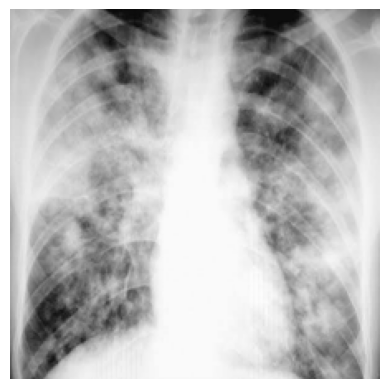

In [12]:
plt.imshow(img)
plt.axis('off')
plt.show()


In [13]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict the class probabilities of the image
probs = model.predict(img_array)[0]

# Print the predicted class
if probs[0] > 0.5:
    print('Pneumonia detected with probability:', probs[0])
else:
    print('No Pneumonia detected with probability:', 1 - probs[0])

1/1 [==============================] - 0s 40ms/step
Pneumonia detected with probability: 0.99952817


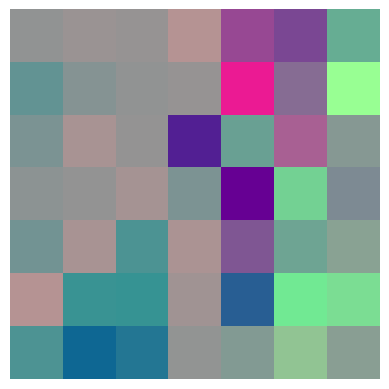

In [14]:
guided_back_prop =grads
gb_viz = np.dstack((
            guided_back_prop[:, :, 0],
            guided_back_prop[:, :, 1],
            guided_back_prop[:, :, 2],
        ))
gb_viz -= np.min(gb_viz)
gb_viz /= gb_viz.max()

imgplot = plt.imshow(gb_viz)
plt.axis("off")
plt.show()

In [22]:
def superimpose(img, heatmap, alpha=0.5):
    img = np.uint8(255 * img)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
    superimposed_img = cv2.addWeighted(img, alpha, heatmap, 1 - alpha, 0)
    return superimposed_img

def predict_image(model, img_path):
    heatmap, img_tensor = generate_grad_cam(model, img_path)
    img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img = img_to_array(img)
    img /= 255.
    superimposed_img = superimpose(img[0], heatmap)

    pred = model.predict(img_tensor)
    if pred[0][0] > 0.5:
        print(f"The model is {round(pred[0][0]*100, 2)}% accurately sure that this is a case of pneumonia.")
    else:
        print(f"The model is {round((1-pred[0][0])*100, 2)}% accurately sure that this is not a case of pneumonia.")
    severity = round(100*np.mean(heatmap), 2)
    print(f"The severity of pneumonia in the image is {severity}%.")
    plt.imshow(superimposed_img)
    plt.show()

def show_on_xray(img_path, heatmap):
  # We use cv2 to load the original image
  img = cv2.imread(img_path)

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + img

  ## Save the image to disk
  superimp_img = cv2.resize(superimposed_img, (224,224))
  cv2.imwrite('./xray_cam.jpg', superimp_img)
  img_samp = cv2.imread('./xray_cam.jpg')  #OpenCV has BGR order
  img_samp = cv2.cvtColor(img_samp, cv2.COLOR_BGR2RGB)  #matplotlib has RGB order

  plt.imshow(img_samp)

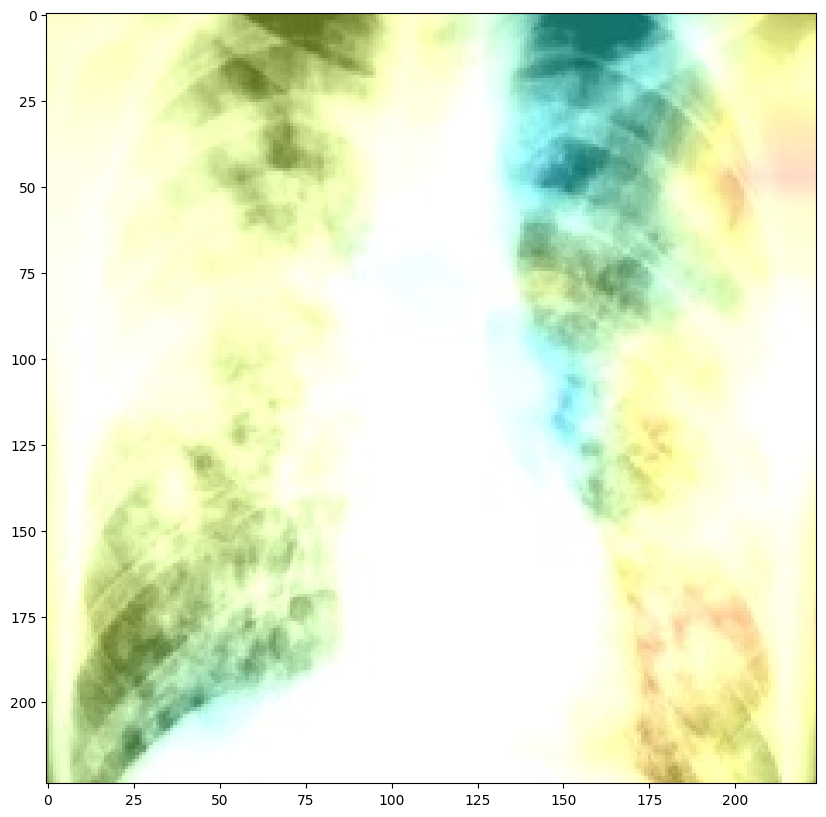

In [23]:
show_on_xray("/content/image.jpeg", gb_viz)

In [29]:
img = cv2.imread('./xray_cam.jpg')
img = cv2.resize(img, (370, 370))
cv2.imwrite("new_xray.jpg", img)

True

In [ ]:
guided_back_prop[:, :, 0].shape

TensorShape([7, 7])

In [ ]:
guided_cam

(224, 224)

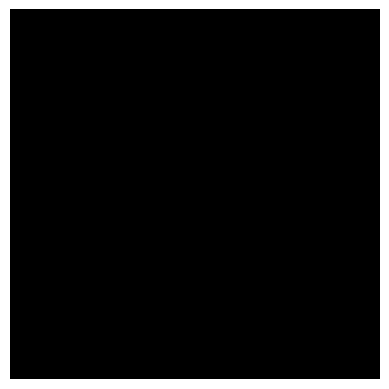

In [ ]:
guided_cam = np.maximum(cam, 0)
guided_cam = guided_cam / np.max(guided_cam) # scale 0 to 1.0
guided_cam = cv2.resize(guided_cam, (7,7))
#pointwise multiplcation of guided backprop and grad CAM
gd_gb = np.dstack((
        guided_back_prop[:, :, 0] * guided_cam,
        guided_back_prop[:, :, 1] * guided_cam,
        guided_back_prop[:, :, 2] * guided_cam,
    ))
imgplot = plt.imshow(gd_gb)
plt.axis("off")
plt.show()

In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

####---Loss
@tf.function
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.

    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)

    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost


###Matrics
@tf.function
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)

    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive

    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1



@tf.function
def Weighted_BCTL(y_true, y_pred):

    # Manually calculate the weighted cross entropy.
    # Formula is qz * -log(sigmoid(x)) + (1 - z) * -log(1 - sigmoid(x))
    # where z are labels, x is logits, and q is the weight.
    # Since the values passed are from sigmoid (assuming in this case)
    # sigmoid(x) will be replaced by y_pred
    # qz * -log(sigmoid(x)) 1e-6 is added as an epsilon to stop passing a zero into the log

    ##get the positive labels

    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred , tf.float32)

    P=tf.cast(tf.math.count_nonzero(y_true), tf.float32)
    N=tf.cast(len(tf.where(y_true==0)),tf.float32)

    BP1=P+N/P
    BP=tf.cast(BP1,tf.float32)

    BN=N+P/N
    BN=tf.cast(BN,tf.float32)


    x_1 =BP*(y_true * -tf.math.log(y_pred + 1e-6))
    x_2 =BN*((1 - y_true) * -tf.math.log(1 - y_pred + 1e-6))

    cost=tf.add(x_1, x_2)
    cost_a=tf.reduce_mean(cost)
    return cost_a

In [ ]:
import torchvision.models as models
r3d_18 = models.video.r3d_18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=R3D_18_Weights.KINETICS400_V1`. You can also use `weights=R3D_18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/r3d_18-b3b3357e.pth" to /root/.cache/torch/hub/checkpoints/r3d_18-b3b3357e.pth
100%|██████████| 127M/127M [00:00<00:00, 209MB/s]


In [ ]:
import tensorflow as tf
import math
###---Number-of-GPU
NUM_OF_GPU=1
DISTRIIBUTED_STRATEGY_GPUS=["gpu:0","gpu:1","gpu:2"]
##Network Configuration
NUMBER_OF_CLASSES=5
INPUT_PATCH_SIZE=(224,160,160, 1)
TRAIN_NUM_RES_UNIT=3
TRAIN_NUM_FILTERS=(16, 32, 64, 128)
TRAIN_STRIDES=((1, 1, 1), (2, 2, 2), (2, 2, 2), (2, 2, 2))
TRAIN_CLASSIFY_ACTICATION=tf.nn.relu6
TRAIN_KERNAL_INITIALIZER=tf.keras.initializers.VarianceScaling(distribution='uniform')
TRAIN_CLASSIFY_LEARNING_RATE =1e-4
TRAIN_CLASSIFY_LOSS=Weighted_BCTL
OPTIMIZER=tf.keras.optimizers.Adam(lr=TRAIN_CLASSIFY_LEARNING_RATE,epsilon=1e-5)
TRAIN_CLASSIFY_METRICS=tf.keras.metrics.AUC()

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np

###Residual Block
def Residual_Block(inputs,
                 out_filters,
                 kernel_size=(3, 3, 3),
                 strides=(1, 1, 1),
                 use_bias=False,
                 activation=tf.nn.relu6,
                 kernel_initializer=tf.keras.initializers.VarianceScaling(distribution='uniform'),
                 bias_initializer=tf.zeros_initializer(),
                 kernel_regularizer=tf.keras.regularizers.l2(l=0.001),
                 bias_regularizer=None,
                 **kwargs):


    conv_params={'padding': 'same',
                   'use_bias': use_bias,
                   'kernel_initializer': kernel_initializer,
                   'bias_initializer': bias_initializer,
                   'kernel_regularizer': kernel_regularizer,
                   'bias_regularizer': bias_regularizer}

    in_filters = inputs.get_shape().as_list()[-1]
    x=inputs
    orig_x=x

    ##building
    # Adjust the strided conv kernel size to prevent losing information
    k = [s * 2 if s > 1 else k for k, s in zip(kernel_size, strides)]

    if np.prod(strides) != 1:
            orig_x = tf.keras.layers.MaxPool3D(pool_size=strides,strides=strides,padding='valid')(orig_x)

    ##sub-unit-0
    x=tf.keras.layers.BatchNormalization()(x)
    x=activation(x)
    x=tf.keras.layers.Conv3D(filters=out_filters,kernel_size=k,strides=strides,**conv_params)(x)

    ##sub-unit-1
    x=tf.keras.layers.BatchNormalization()(x)
    x=activation(x)
    x=tf.keras.layers.Conv3D(filters=out_filters,kernel_size=kernel_size,strides=(1,1,1),**conv_params)(x)

        # Handle differences in input and output filter sizes
    if in_filters < out_filters:
        orig_x = tf.pad(tensor=orig_x,paddings=[[0, 0]] * (len(x.get_shape().as_list()) - 1) + [[
                    int(np.floor((out_filters - in_filters) / 2.)),
                    int(np.ceil((out_filters - in_filters) / 2.))]])

    elif in_filters > out_filters:
        orig_x = tf.keras.layers.Conv3D(filters=out_filters,kernel_size=kernel_size,strides=(1,1,1),**conv_params)(orig_x)

    x += orig_x
    return x



## Resnet----3D
def Resnet3D(inputs,
              num_classes,
              num_res_units=TRAIN_NUM_RES_UNIT,
              filters=TRAIN_NUM_FILTERS,
              strides=TRAIN_STRIDES,
              use_bias=False,
              activation=TRAIN_CLASSIFY_ACTICATION,
              kernel_initializer=TRAIN_KERNAL_INITIALIZER,
              bias_initializer=tf.zeros_initializer(),
              kernel_regularizer=tf.keras.regularizers.l2(l=0.001),
              bias_regularizer=None,
              **kwargs):
    conv_params = {'padding': 'same',
                   'use_bias': use_bias,
                   'kernel_initializer': kernel_initializer,
                   'bias_initializer': bias_initializer,
                   'kernel_regularizer': kernel_regularizer,
                   'bias_regularizer': bias_regularizer}


    ##building
    k = [s * 2 if s > 1 else 3 for s in strides[0]]


    #Input
    x = inputs
    #1st-convo
    x=tf.keras.layers.Conv3D(filters[0], k, strides[0], **conv_params)(x)

    for res_scale in range(1, len(filters)):
        x = Residual_Block(
                inputs=x,
                out_filters=filters[res_scale],
                strides=strides[res_scale],
                activation=activation,
                name='unit_{}_0'.format(res_scale))
        for i in range(1, num_res_units):
            x = Residual_Block(
                    inputs=x,
                    out_filters=filters[res_scale],
                    strides=(1, 1, 1),
                    activation=activation,
                    name='unit_{}_{}'.format(res_scale, i))


    x=tf.keras.layers.BatchNormalization()(x)
    x=activation(x)
    #axis = tuple(range(len(x.get_shape().as_list())))[1:-1]
    #x = tf.reduce_mean(x, axis=axis, name='global_avg_pool')
    x=tf.keras.layers.GlobalAveragePooling3D()(x)
    x =tf.keras.layers.Dropout(0.5)(x)
    classifier=tf.keras.layers.Dense(units=num_classes,activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=classifier)
    #model.compile(optimizer=Adam(lr=TRAIN_CLASSIFY_LEARNING_RATE), loss=[TRAIN_CLASSIFY_LOSS], metrics=[TRAIN_CLASSIFY_METRICS,tf.keras.metrics.AUC()])

    return model

In [ ]:
MODEL_WEIGHT="/content/drive/MyDrive/IPD/gradcam.h5"
CLASS_INDEX=1 # Index of the class for which you want to see the Guided-gradcam
INPUT_PATCH_SIZE_SLICE_NUMBER=224 # Input patch slice you want to feed at a time
LAYER_NAME='conv5_block3_2_conv' # Name of the layer from where you want to get the Guided-GradCAM
NIFTI_PATH="/content/drive/MyDrive/IPD/XXX.nii.gz"
SAVE_PATH="/content/drive/MyDrive/IPD/ML_Guided_GradCaN_XXXX.nii.gz"

In [ ]:
## Import Libararies
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import os
import datetime
import numpy as np
import pandas as pd
import SimpleITK as sitk
import math
import cv2
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from skimage.transform import resize

# Function to get the image chunk fot guided GradCAM
def Get_image_array_Array_and_give_chunk(image_array,patch_slice_slice):

    Devide_integer=image_array.shape[0] // patch_slice_slice
    Reminder= image_array.shape[0] % patch_slice_slice
    print('CT Volume_Shape={}'.format(image_array.shape))
    print('Devide_integer={}'.format(Devide_integer))
    print('Reminder={}'.format(Reminder))
    print('Total of {} + {} ={} Should ={}'.format(patch_slice_slice*Devide_integer,Reminder,patch_slice_slice*Devide_integer+Reminder,image_array.shape[0]))

    lastpatch_starts_from= (image_array.shape[0])-patch_slice_slice
    print(lastpatch_starts_from)

    patch_list=[]
    patch_start=0
    patch_end=patch_slice_slice
    for i in range(Devide_integer):
        #print(patch_start)
        #print(patch_end)
        ct_volume=image_array[patch_start:patch_end,:]
        #print(ct_volume.shape)
        patch_list.append(ct_volume)
        patch_start+=patch_slice_slice
        patch_end+=patch_slice_slice

    last_slice_number_would_be=image_array.shape[0]
    print(last_slice_number_would_be)
    last_patch_When_making_nifty=(patch_slice_slice)-Reminder
    print(last_patch_When_making_nifty)
    Slice_will_start_from_here=last_slice_number_would_be-patch_slice_slice
    print(Slice_will_start_from_here)
    last_patch=image_array[Slice_will_start_from_here:,:]
    last_patch.shape
    patch_list.append(last_patch)

    return patch_list,last_patch_When_making_nifty

def Get_Build_model(Input_patch_size,Model_weight,Layer_name):
    inputs = tf.keras.Input(shape=Input_patch_size, name='CT')
    Model_3D=Resnet3D(inputs,num_classes=NUMBER_OF_CLASSES)
    Model_3D = load_model(Model_weight)
    print('Loading The Model from this path--{}'.format("/content/drive/MyDrive/IPD/gradcam.h5"))
    Model_3D.summary()
    Build_model=tf.keras.models.Model([Model_3D.inputs], [Model_3D.get_layer(Layer_name).output, Model_3D.output])

    return Build_model


def Guided_GradCAM_3D(Grad_model,ct_io,Class_index):

    # Create a graph that outputs target convolution and output
    grad_model = Grad_model
    input_ct_io=tf.expand_dims(ct_io, axis=-1)
    input_ct_io=tf.expand_dims(input_ct_io, axis=0)

    grad_model = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    with tf.GradientTape() as tape:
        preds, conv_outputs = grad_model(x)
        class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]
    grads = tape.gradient(loss, conv_outputs)[0]
    output = conv_outputs[0]

    # with tf.GradientTape() as tape:
    #     conv_outputs, predictions = grad_model(x)
    #     loss = predictions[:, Class_index]
    # # Extract filters and gradients
    # output = conv_outputs[0]
    # grads = tape.gradient(loss, conv_outputs)[0]

    ##--Guided Gradient Part
    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')
    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=(0, 1))
    # Build a ponderated map of filters according to gradients importance

    cam = np.ones(conv_outputs.shape[1:3], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * conv_outputs[0, :, :, i]

    # cam = np.ones(output.shape[0:3], dtype=np.float32)
    # for index, w in enumerate(weights):
    #     cam += w * output[:, :, :, index]

    capi=resize(cam,(ct_io.shape))
    print(capi.shape)
    capi = np.maximum(capi,0)
    heatmap = (capi - capi.min()) / (capi.max() - capi.min())
    return heatmap

def generate_guided_grad_cam(Nifti_path,Model_weight,Class_index,Input_patch_size_slice_number,Layer_name,Save_path):
    # Reading the CT
    img_path=Nifti_path
    Class_index=Class_index
    Model_weight=Model_weight
    Layer_name=Layer_name
    img_sitk = sitk.ReadImage(img_path, sitk.sitkFloat32)
    image= sitk.GetArrayFromImage(img_sitk)
    Input_patch_size=[224,image.shape[0], image.shape[1], 1]

    get_grad_model=Get_Build_model(Input_patch_size,Model_weight,Layer_name)
    ct_patch_chunk_List,last_patch_number=Get_image_array_Array_and_give_chunk(image_array=image,patch_slice_slice=Input_patch_size_slice_number)
    first_heatmap=Guided_GradCAM_3D(get_grad_model,ct_patch_chunk_List[0],Class_index=Class_index)
    heatmap_concat=first_heatmap
    for i in range(1,(len(ct_patch_chunk_List)-1)):
        get_heatmap=Guided_GradCAM_3D(get_grad_model,ct_patch_chunk_List[i],Class_index=Class_index)
        heatmap_concat=np.concatenate((heatmap_concat, get_heatmap), axis=0)
    last_heatmap=Guided_GradCAM_3D(get_grad_model,ct_patch_chunk_List[-1],Class_index=Class_index)
    heatmap_concat=np.concatenate((heatmap_concat, last_heatmap[last_patch_number:,:]), axis=0)
    s_itk_image = sitk.GetImageFromArray(heatmap_concat)
    s_itk_image.CopyInformation(img_sitk)
    sitk.WriteImage(s_itk_image, Save_path)
    return

if __name__ == '__main__':

    img_path="/content/image.jpg"
    Model_weight="/content/drive/MyDrive/IPD/gradcam.h5"
    Class_index=1
    Input_patch_size_slice_number=64
    Layer_name="conv5_block3_2_conv"
    Save_path="/content/drive/MyDrive/IPD/ML_Guided_GradCaN_XXXX.nii.gz"
    generate_guided_grad_cam(img_path,Model_weight,Class_index,Input_patch_size_slice_number,Layer_name,Save_path)

Loading The Model from this path--/content/drive/MyDrive/IPD/gradcam.h5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                      

In [ ]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
preprocessed_image = preprocess_image(image)  # Preprocess the image according to your model's requirements

# Create a Lime explainer
explainer = lime_image.LimeImageExplainer()

# Define the function to classify the image using your model
def classifier_fn(images):
    # Preprocess the images (if required) and make predictions using your model
    preprocessed_images = preprocess_images(images)  # Preprocess the images according to your model's requirements
    predictions = model.predict(preprocessed_images)
    return predictions

# Generate an explanation using Lime
explanation = explainer.explain_instance(preprocessed_image, classifier_fn, top_labels=1)

# Get the top explanation for the predicted class
lime_heatmap, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, hide_rest=False)

# Plot the original image with the Lime heatmap overlaid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(mark_boundaries(lime_heatmap, mask))
axs[1].axis('off')
axs[1].set_title('Lime Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
def fn_preprocess_images(data_directory, image_size):
  bacteria_pneumonia_dir = os.path.join(data_directory, 'NORMAL')
  virus_pneumonia_dir = os.path.join(data_directory, 'PNEUMONIA')

  # Get the list of all the images
  bacteria_cases = glob(bacteria_pneumonia_dir + '/*.jpeg')
  virus_cases = glob(virus_pneumonia_dir + '/*.jpeg')

  #Store all images and labels
  image_data_list = []
  labels = []

  for img_path in bacteria_cases:
    img = image.load_img(img_path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #print('Input image shape:', x.shape)
    image_data_list.append(x)
    labels.append(0)

  for img_path in virus_cases:
    img = image.load_img(img_path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #print('Input image shape:', x.shape)
    image_data_list.append(x)
    labels.append(1)

  #Convert the images to tensor shape (n_images, h, w, channel)
  img_data = np.array(image_data_list)
  img_data=np.rollaxis(img_data,1,0)
  img_data=img_data[0]
  print("Final data shape: "+str(img_data.shape))

  #convert label list to numpy array
  labels = np.array(labels)

  return img_data,labels


test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data= test_datagen.flow_from_directory(
    '/content/drive/MyDrive/New Dataset/val',
    target_size=(224, 224),
    batch_size=4,
    class_mode='binary'
)
preds = model.predict(test_data)
test_data_path="/content/drive/MyDrive/New Dataset/val"

test_data, test_labels  = fn_preprocess_images(test_data_path, image_size = 224)


y_preds = preds.ravel()
model_fpr, model_tpr, model_threshold = roc_curve(test_labels, y_preds)
model_auc = auc(model_fpr, model_tpr)


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(model_fpr, model_tpr, label='AUC Score(area = {:.3f})'.format(model_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DenseNet 121 using class weights - ROC curve ')
plt.legend(loc='best')
plt.show()


gUIDED gRADCAM

<ipython-input-21-a741d8a4cc3f>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


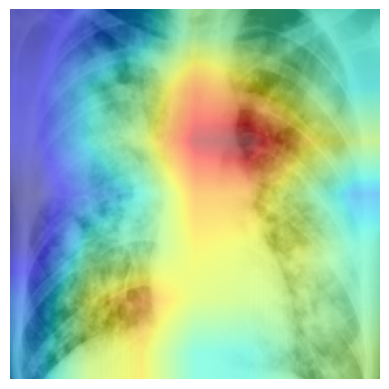

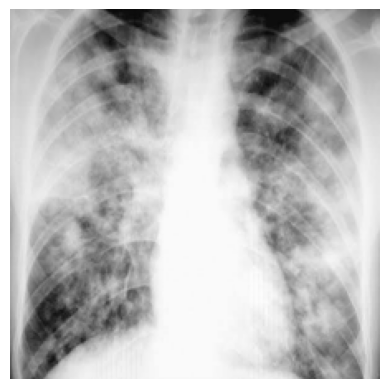

In [ ]:

# Apply a color map to the heatmapimport tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load your trained model
#model = tf.keras.models.load_model('/content/drive/MyDrive/Gradcam/final2.h5')

# Load and preprocess your input image
#img = cv2.imread('/content/drive/MyDrive/New Dataset/val/NORMAL/NORMAL2-IM-1437-0001.jpeg')
img=cv2.imread('/content/drive/MyDrive/chest_xray/WhatsApp Image 2023-05-16 at 05.50.35.jpeg')
img = cv2.resize(img, (224, 224))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
img_size = (224, 224)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(img, (224, 224))
x = np.expand_dims(resized_img, axis=0)
x = x / 255.0  # Normalize the image

# Define the target class index for Guided Grad-CAM
target_class_index = 0  # Update with your desired class index

# Obtain the last convolutional layer
last_conv_layer = model.get_layer('conv5_block3_2_conv')

# Create a new model that outputs both the predictions and the last convolutional layer's output
grad_model = tf.keras.models.Model(inputs=model.inputs, outputs=[model.output, last_conv_layer.output])

# Compute the gradient of the target class output with respect to the feature map
with tf.GradientTape() as tape:
    predictions, conv_outputs = grad_model(x)
    target_class_output = predictions[:, target_class_index]
grads = tape.gradient(target_class_output, conv_outputs)[0]

# Compute the channel-wise mean of the gradients
weights = tf.reduce_mean(grads, axis=(0, 1))

# Multiply each channel in the feature map array by "how important this channel is" with regard to the target class
cam = np.ones(conv_outputs.shape[1:3], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * conv_outputs[0, :, :, i]

# Normalize the heatmap between 0 and 255
heatmap = cam.numpy()
heatmap = cv2.resize(heatmap, (224,224))
heatmap = np.maximum(heatmap, 0)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)
heatmap = (heatmap * 255).astype(np.uint8)
# Apply a color map to the heatmap
jet = cm.get_cmap("jet")
heatmap = jet(heatmap)
heatmap = np.uint8(heatmap * 255)

# Convert the heatmap to RGB format
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGBA2RGB)

# Resize the heatmap to be the same size as the original image
heatmap = cv2.resize(heatmap, (224,224))


# Overlay the heatmap on the original image
guided_gradcam = cv2.addWeighted(np.array(img), 0.5, heatmap, 0.5, 0)

# Show the result
plt.imshow(guided_gradcam)
plt.axis('off')
plt.show()

# Show the result
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Gradcam/Extra2.h5')

In [ ]:
img = cv2.imread('/content/drive/MyDrive/New Dataset/val/PNEUMONIA/person1951_bacteria_4882.jpeg')
img = cv2.resize(img, (224, 224))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.__class__.__name__)


0 input_1 InputLayer
1 conv1_pad ZeroPadding2D
2 conv1_conv Conv2D
3 pool1_pad ZeroPadding2D
4 pool1_pool MaxPooling2D
5 conv2_block1_preact_bn BatchNormalization
6 conv2_block1_preact_relu Activation
7 conv2_block1_1_conv Conv2D
8 conv2_block1_1_bn BatchNormalization
9 conv2_block1_1_relu Activation
10 conv2_block1_2_pad ZeroPadding2D
11 conv2_block1_2_conv Conv2D
12 conv2_block1_2_bn BatchNormalization
13 conv2_block1_2_relu Activation
14 conv2_block1_0_conv Conv2D
15 conv2_block1_3_conv Conv2D
16 conv2_block1_out Add
17 conv2_block2_preact_bn BatchNormalization
18 conv2_block2_preact_relu Activation
19 conv2_block2_1_conv Conv2D
20 conv2_block2_1_bn BatchNormalization
21 conv2_block2_1_relu Activation
22 conv2_block2_2_pad ZeroPadding2D
23 conv2_block2_2_conv Conv2D
24 conv2_block2_2_bn BatchNormalization
25 conv2_block2_2_relu Activation
26 conv2_block2_3_conv Conv2D
27 conv2_block2_out Add
28 conv2_block3_preact_bn BatchNormalization
29 conv2_block3_preact_relu Activation
30 conv2